<a href="https://colab.research.google.com/github/prateekrao/Breast-Cancer-Detection/blob/main/Conv_1_83%25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam, Adagrad, Adadelta
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -d dataset "/content/drive/MyDrive/master-dataset.zip"

In [6]:
path = "/content/dataset/master-dataset"

In [5]:
gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [7]:
train_set = gen.flow_from_directory(
    path,
    target_size = (50,50),
    color_mode = 'rgb',
    shuffle = True,
    class_mode = 'categorical',
    batch_size = 32,
    seed = 865,
    subset = 'training'
)

Found 222020 images belonging to 2 classes.


In [8]:
test_set = gen.flow_from_directory(
    path, 
    target_size = (50,50),
    color_mode = 'rgb',
    shuffle = False,
    class_mode = 'categorical',
    batch_size= 32,
    seed = 865,
    subset = 'validation'
)

Found 55504 images belonging to 2 classes.


In [10]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding = 'same', activation='relu', input_shape = (50,50,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), padding = 'same', activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))

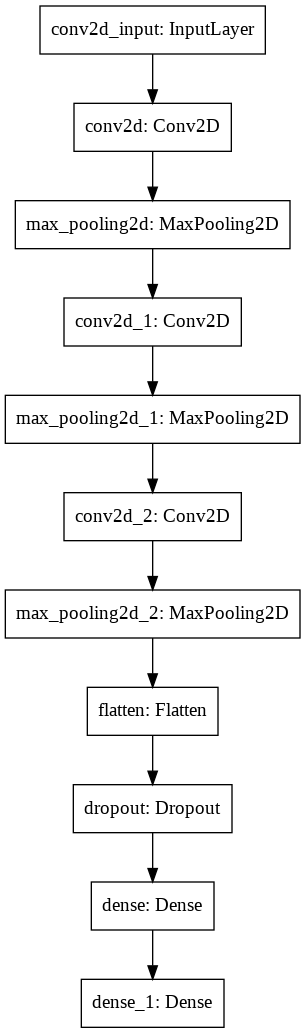

In [16]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

In [14]:
fpath = "/content/conv1.h5"

checkpoint = ModelCheckpoint(fpath, monitor = 'val_loss', save_best_only = True, mode = 'min')
checkpoint

In [15]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(train_set, validation_data = test_set, callbacks = checkpoint, batch_size = 32, shuffle = True,  epochs = 5)

Epoch 1/5
6939/6939 [==============================] - 175s 25ms/step - loss: 0.3390 - accuracy: 0.8569 - val_loss: 0.4887 - val_accuracy: 0.7760
Epoch 2/5
6939/6939 [==============================] - 119s 17ms/step - loss: 0.3183 - accuracy: 0.8665 - val_loss: 0.4146 - val_accuracy: 0.8157
Epoch 3/5
6939/6939 [==============================] - 116s 17ms/step - loss: 0.3098 - accuracy: 0.8712 - val_loss: 0.4234 - val_accuracy: 0.8151
Epoch 4/5
6939/6939 [==============================] - 116s 17ms/step - loss: 0.3035 - accuracy: 0.8730 - val_loss: 0.4328 - val_accuracy: 0.8079
Epoch 5/5
6939/6939 [==============================] - 116s 17ms/step - loss: 0.2997 - accuracy: 0.8748 - val_loss: 0.3784 - val_accuracy: 0.8370


In [21]:
model.save_weights("/content/val83%.h5")